In [3]:
import numpy as np
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

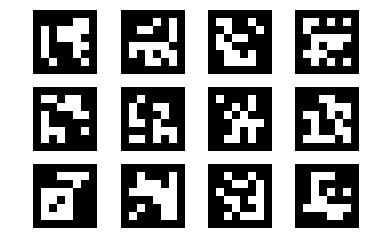

In [6]:

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

# plt.savefig("_data/markers.pdf")
plt.show()

In [10]:
frame = cv2.imread('senior/IMG_9508.JPG')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

In [29]:
corners[0]
#x,y from top left and go clockwise

array([[[1728., 2749.],
        [1754., 2820.],
        [1685., 2852.],
        [1658., 2780.]]], dtype=float32)

In [33]:
XIMG_NAME = 'senior/IMG_9508.JPG'
YIME_NAME = 'senior/IMG_9508.JPG'
ximg = cv2.imread(XIMG_NAME)
yimg = cv2.imread(YIME_NAME)

In [34]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

In [42]:
frame = ximg
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, idx, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
arucox = {}
for i in range(ids.shape[0]):
    arucox[ids[i][0]] = corners[i]

In [43]:
frame = yimg
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
arucoy = {}
for i in range(ids.shape[0]):
    arucoy[ids[i][0]] = corners[i]

In [54]:
corner = [0,1,2,3]
tl_x = arucox[0]
tr_x = arucox[1]
bl_x = arucox[2]
br_x = arucox[3]
tl_y = arucoy[0]
tr_y = arucoy[1]
bl_y = arucoy[2]
br_y = arucoy[3]

In [53]:
inf = float('inf')

def getline(p1,p2):
    [y1,x1] = p1
    [y2,x2] = p2
    #y = mx + c
    if x1==x2:
        return [inf,x1]
    if y1==y2:
        return [0,inf]
    m = (y1-y2)/(x1-x2)
    c = y1-m*x1
    return [m,c]

def divline(p1,p2,ratio): #ratio in (0,1) close to p1
    [y1,x1] = p1
    [y2,x2] = p2
    rratio = 1-ratio
    x = int(x1*rratio + x2*ratio)
    y = int(y1*rratio + y2*ratio)
    return [y,x]

def sratio(l,r,p,tl,tr,bl,br):
    mid = (l+r)/2
    p1 = divline(tl,tr,mid)
    p2 = divline(bl,br,mid)
    [m,c] = getline(p1,p2)
    if m == inf:
        if abs(c-p[1] < 0.5):
            return mid
        if c > p[1]:
            return sratio(l,mid,p,tl,tr,bl,br)
        return sratio(mid,r,p,tl,tr,bl,br)
    x = (p[0]-c)/m
    if abs(x-p[1] < 0.5):
        return mid
    if x > p[1]:
        return sratio(l,mid,p,tl,tr,bl,br)
    return sratio(mid,r,p,tl,tr,bl,br)


In [49]:
pos = {}
for x in arucox:
    if x in corner:
        continue
    ratiox = sratio(0,1,arucox[x][0],tl_x,tr_x,bl_x,br_x)
    ratiox3 = sratio(0,1,arucox[x][3],tl_x,tr_x,bl_x,br_x)
    ratioy = sratio(0,1,arucoy[x][0],tl_y,tr_y,bl_y,br_y)
    ratioy3 = sratio(0,1,arucoy[x][3],tl_y,tr_y,bl_y,br_y)
    
    theta = math.atan((ratiox-ratiox3)/(ratioy-ratioy3)*W/H)
    posx[x] = str(ratioy*H) + ' ' + str(ratiox*W) + ' ' + str(theta)

In [52]:
##write file
filename = 'aruco.txt'
file = open(filename,'w')
for x in pos:
    txt = str(x) + ' ' + posx[x] + '\n'
    file.write()
file.close()

True